In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
import xgboost as xgb
import lightgbm as lgb
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
# ==========================================
# الخطوة 1: تحميل البيانات
# ==========================================
print("=" * 50)
print("الخطوة 1: تحميل البيانات")
print("=" * 50)

# استبدل 'your_file.csv' باسم ملفك
df = pd.read_csv('continuous dataset.csv')
print(f"عدد الصفوف: {len(df)}")
print(f"عدد الأعمدة: {len(df.columns)}")
print("\nأول 5 صفوف:")
print(df.head())

الخطوة 1: تحميل البيانات
عدد الصفوف: 48048
عدد الأعمدة: 17

أول 5 صفوف:
              datetime  nat_demand    T2M_toc  QV2M_toc   TQL_toc    W2M_toc  \
0  2015-01-03 01:00:00    970.3450  25.865259  0.018576  0.016174  21.850546   
1  2015-01-03 02:00:00    912.1755  25.899255  0.018653  0.016418  22.166944   
2  2015-01-03 03:00:00    900.2688  25.937280  0.018768  0.015480  22.454911   
3  2015-01-03 04:00:00    889.9538  25.957544  0.018890  0.016273  22.110481   
4  2015-01-03 05:00:00    893.6865  25.973840  0.018981  0.017281  21.186089   

     T2M_san  QV2M_san   TQL_san    W2M_san    T2M_dav  QV2M_dav   TQL_dav  \
0  23.482446  0.017272  0.001855  10.328949  22.662134  0.016562  0.096100   
1  23.399255  0.017265  0.001327  10.681517  22.578943  0.016509  0.087646   
2  23.343530  0.017211  0.001428  10.874924  22.531030  0.016479  0.078735   
3  23.238794  0.017128  0.002599  10.518620  22.512231  0.016487  0.068390   
4  23.075403  0.017059  0.001729   9.733589  22.481653  0

In [3]:
df

,datetime,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
0,2015-01-03 01:00:00,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,22.662134,0.016562,0.096100,5.364148,0,0,0
1,2015-01-03 02:00:00,912.1755,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,22.578943,0.016509,0.087646,5.572471,0,0,0
2,2015-01-03 03:00:00,900.2688,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,22.531030,0.016479,0.078735,5.871184,0,0,0
3,2015-01-03 04:00:00,889.9538,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,22.512231,0.016487,0.068390,5.883621,0,0,0
4,2015-01-03 05:00:00,893.6865,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,22.481653,0.016456,0.064362,5.611724,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48043,2020-06-26 20:00:00,1128.5592,27.246545,0.020303,0.055511,9.289304,25.715295,0.019746,0.121552,1.990773,23.746545,0.018381,0.150879,2.444658,0,0,1
48044,2020-06-26 21:00:00,1112.7488,27.099573,0.020395,0.053848,9.837504,25.552698,0.019632,0.153870,2.094459,23.693323,0.018320,0.156311,2.515814,0,0,1
48045,2020-06-26 22:00:00,1081.5680,26.971155,0.020448,0.057251,10.262464,25.393030,0.019518,0.144531,2.396369,23.658655,0.018327,0.153259,2.800717,0,0,1
48046,2020-06-26 23:00:00,1041.6240,26.867487,0.020464,0.064178,10.326567,25.258112,0.019403,0.108063,2.720871,23.601862,0.018358,0.152771,3.138132,0,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48048 entries, 0 to 48047
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    48048 non-null  object 
 1   nat_demand  48048 non-null  float64
 2   T2M_toc     48048 non-null  float64
 3   QV2M_toc    48048 non-null  float64
 4   TQL_toc     48048 non-null  float64
 5   W2M_toc     48048 non-null  float64
 6   T2M_san     48048 non-null  float64
 7   QV2M_san    48048 non-null  float64
 8   TQL_san     48048 non-null  float64
 9   W2M_san     48048 non-null  float64
 10  T2M_dav     48048 non-null  float64
 11  QV2M_dav    48048 non-null  float64
 12  TQL_dav     48048 non-null  float64
 13  W2M_dav     48048 non-null  float64
 14  Holiday_ID  48048 non-null  int64  
 15  holiday     48048 non-null  int64  
 16  school      48048 non-null  int64  
dtypes: float64(13), int64(3), object(1)
memory usage: 6.2+ MB


In [5]:
df.isnull().sum()

datetime      0
nat_demand    0
T2M_toc       0
QV2M_toc      0
TQL_toc       0
W2M_toc       0
T2M_san       0
QV2M_san      0
TQL_san       0
W2M_san       0
T2M_dav       0
QV2M_dav      0
TQL_dav       0
W2M_dav       0
Holiday_ID    0
holiday       0
school        0
dtype: int64

In [6]:
# ==========================================
# الخطوة 2: معالجة التاريخ والوقت
# ==========================================
print("\n" + "=" * 50)
print("الخطوة 2: معالجة التاريخ والوقت")
print("=" * 50)

df['datetime'] = pd.to_datetime(df['datetime'])
df = df.sort_values('datetime').reset_index(drop=True)

# استخراج features من التاريخ
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df['dayofweek'] = df['datetime'].dt.dayofweek
df['quarter'] = df['datetime'].dt.quarter
df['dayofyear'] = df['datetime'].dt.dayofyear
df['weekofyear'] = df['datetime'].dt.isocalendar().week

print("تم استخراج features التاريخ بنجاح")


الخطوة 2: معالجة التاريخ والوقت
تم استخراج features التاريخ بنجاح


In [7]:
# ==========================================
# الخطوة 3: إنشاء Lag Features
# ==========================================
print("\n" + "=" * 50)
print("الخطوة 3: إنشاء Lag Features")
print("=" * 50)

# Lag features للطلب السابق - نستخدم فترات أطول لتجنب data leakage
for lag in [24, 48, 72, 168]:  # يوم، يومين، 3 أيام، أسبوع
    df[f'demand_lag_{lag}'] = df['nat_demand'].shift(lag)

# Rolling mean features - نفس الشيء، نستخدم windows أكبر
for window in [24, 48, 72, 168]:
    df[f'demand_rolling_mean_{window}'] = df['nat_demand'].rolling(window=window).mean()
    df[f'demand_rolling_std_{window}'] = df['nat_demand'].rolling(window=window).std()

# إضافة rolling features للطقس أيضاً
weather_cols = ['T2M_toc', 'QV2M_toc', 'W2M_toc', 'T2M_san', 'QV2M_san', 'W2M_san', 
                'T2M_dav', 'QV2M_dav', 'W2M_dav']
for col in weather_cols:
    if col in df.columns:
        df[f'{col}_rolling_mean_24'] = df[col].rolling(window=24).mean()

print("تم إنشاء Lag Features بنجاح")

# حذف الصفوف التي تحتوي على NaN بسبب lag
df = df.dropna().reset_index(drop=True)
print(f"عدد الصفوف بعد حذف NaN: {len(df)}")


الخطوة 3: إنشاء Lag Features
تم إنشاء Lag Features بنجاح
عدد الصفوف بعد حذف NaN: 47880



الخطوة 4: تحليل البيانات
تم حفظ الرسوم في 'demand_analysis.png'


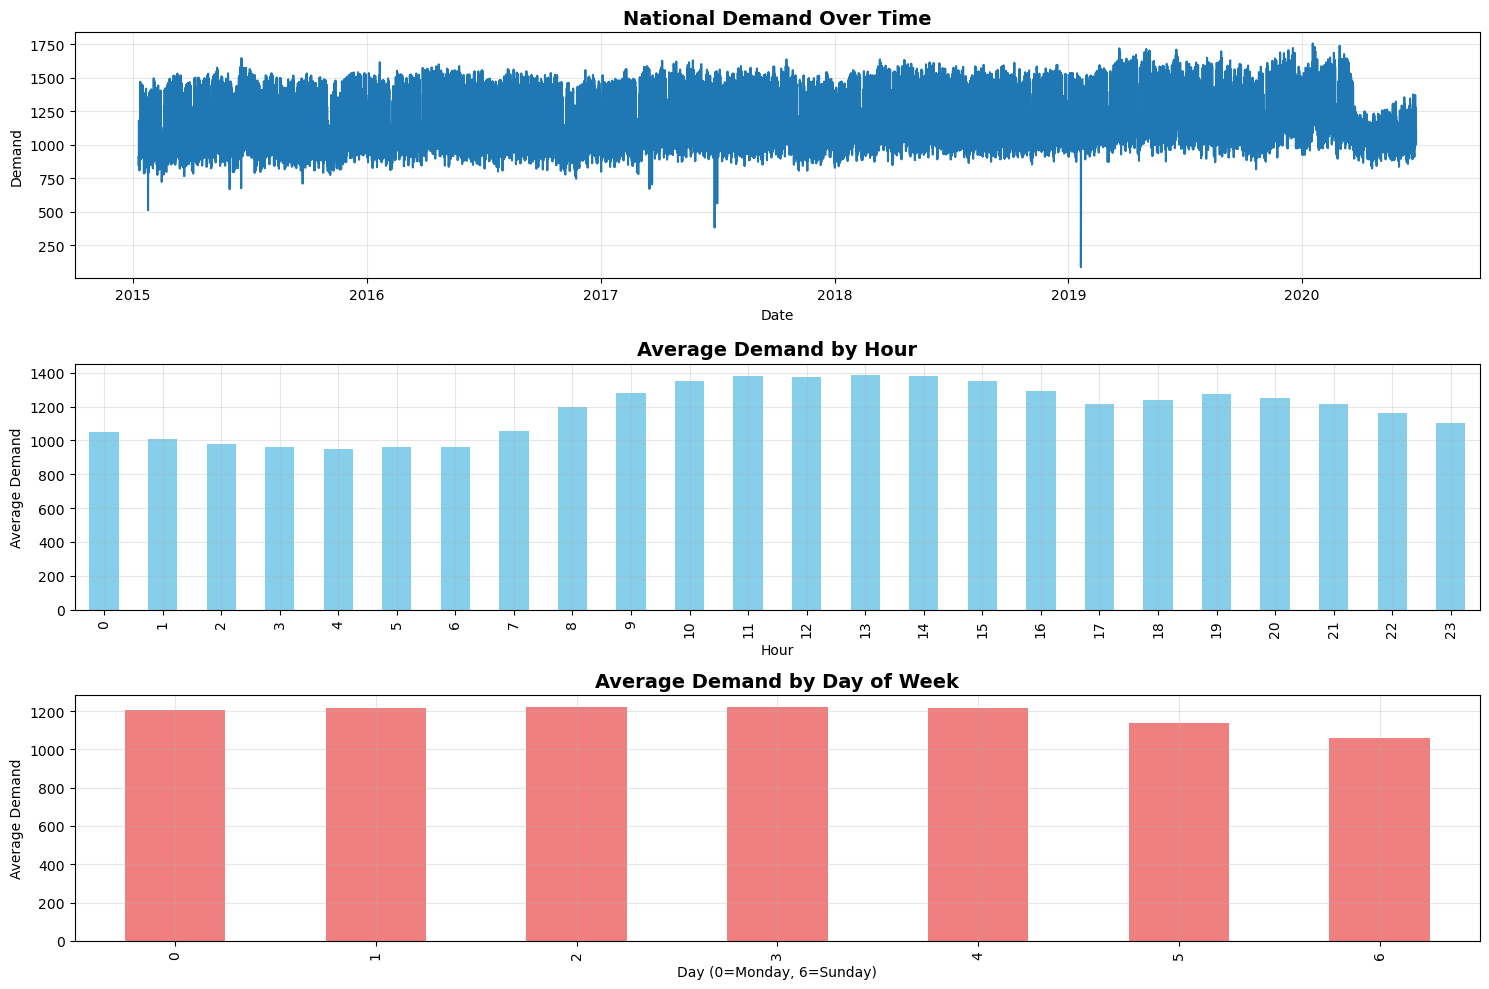

In [8]:
# ==========================================
# الخطوة 4: تحليل البيانات
# ==========================================
print("\n" + "=" * 50)
print("الخطوة 4: تحليل البيانات")
print("=" * 50)

plt.figure(figsize=(15, 10))

# رسم الطلب عبر الزمن
plt.subplot(3, 1, 1)
plt.plot(df['datetime'], df['nat_demand'])
plt.title('National Demand Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.grid(True, alpha=0.3)

# رسم الطلب حسب ساعة اليوم
plt.subplot(3, 1, 2)
df.groupby('hour')['nat_demand'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Demand by Hour', fontsize=14, fontweight='bold')
plt.xlabel('Hour')
plt.ylabel('Average Demand')
plt.grid(True, alpha=0.3)

# رسم الطلب حسب يوم الأسبوع
plt.subplot(3, 1, 3)
df.groupby('dayofweek')['nat_demand'].mean().plot(kind='bar', color='lightcoral')
plt.title('Average Demand by Day of Week', fontsize=14, fontweight='bold')
plt.xlabel('Day (0=Monday, 6=Sunday)')
plt.ylabel('Average Demand')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('demand_analysis.png', dpi=300, bbox_inches='tight')
print("تم حفظ الرسوم في 'demand_analysis.png'")
plt.show()

In [9]:
# ==========================================
# الخطوة 5: تقسيم البيانات
# ==========================================
print("\n" + "=" * 50)
print("الخطوة 5: تقسيم البيانات")
print("=" * 50)

# تحديد المتغيرات
target = 'nat_demand'
features = [col for col in df.columns if col not in ['datetime', 'nat_demand']]

X = df[features]
y = df[target]

# تقسيم البيانات (80% تدريب، 20% اختبار)
# مهم: في time series نقسم بالترتيب الزمني
split_idx = int(len(df) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# إضافة Validation Set لمراقبة الـ overfitting
val_idx = int(len(X_train) * 0.8)
X_val = X_train[val_idx:]
y_val = y_train[val_idx:]
X_train = X_train[:val_idx]
y_train = y_train[:val_idx]

print(f"حجم بيانات التدريب: {len(X_train)}")
print(f"حجم بيانات التحقق (Validation): {len(X_val)}")
print(f"حجم بيانات الاختبار: {len(X_test)}")


الخطوة 5: تقسيم البيانات
حجم بيانات التدريب: 30643
حجم بيانات التحقق (Validation): 7661
حجم بيانات الاختبار: 9576


In [10]:
# ==========================================
# الخطوة 6: تطبيع البيانات
# ==========================================
print("\n" + "=" * 50)
print("الخطوة 6: تطبيع البيانات")
print("=" * 50)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("تم تطبيع البيانات بنجاح")


الخطوة 6: تطبيع البيانات
تم تطبيع البيانات بنجاح


In [11]:
# ==========================================
# الخطوة 7: تدريب النماذج
# ==========================================
print("\n" + "=" * 50)
print("الخطوة 7: تدريب النماذج المختلفة")
print("=" * 50)

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(
        n_estimators=100, 
        max_depth=15,  # تحديد العمق لمنع overfitting
        min_samples_split=10,
        min_samples_leaf=5,
        random_state=42, 
        n_jobs=-1
    ),
    'Gradient Boosting': GradientBoostingRegressor(
        n_estimators=100,
        max_depth=5,
        learning_rate=0.05,  # معدل تعلم أقل
        subsample=0.8,
        random_state=42
    ),
    'XGBoost': xgb.XGBRegressor(
        n_estimators=100,
        max_depth=5,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1
    ),
    'LightGBM': lgb.LGBMRegressor(
        n_estimators=100,
        max_depth=5,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1,
        verbose=-1
    )
}

results = {}

for name, model in models.items():
    print(f"\n{'='*30}")
    print(f"تدريب نموذج: {name}")
    print(f"{'='*30}")
    
    # تدريب النموذج
    if name == 'Linear Regression':
        model.fit(X_train_scaled, y_train)
        y_val_pred = model.predict(scaler.transform(X_val))
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_val_pred = model.predict(X_val)
        y_pred = model.predict(X_test)

    # ============================================
    # حساب Accuracy بطرق مختلفة
    # ============================================
    
    # 1. Accuracy بناءً على threshold (±5% خطأ يعتبر صح)
    threshold_5 = 0.05
    correct_predictions_5 = np.sum(np.abs((y_test - y_pred) / y_test) <= threshold_5)
    accuracy_5 = (correct_predictions_5 / len(y_test)) * 100
    
    # 2. Accuracy بناءً على threshold (±10% خطأ يعتبر صح)
    threshold_10 = 0.10
    correct_predictions_10 = np.sum(np.abs((y_test - y_pred) / y_test) <= threshold_10)
    accuracy_10 = (correct_predictions_10 / len(y_test)) * 100
    
    # 3. Accuracy Score = (1 - MAPE/100) - كلما قل الخطأ، زادت الدقة
    mape_score = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    accuracy_mape = max(0, 100 - mape_score)
    
    # حساب المقاييس للـ Validation Set
    val_mae = mean_absolute_error(y_val, y_val_pred)
    val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    val_r2 = r2_score(y_val, y_val_pred)
    val_mape = np.mean(np.abs((y_val - y_val_pred) / y_val)) * 100
    
    # حساب المقاييس للـ Test Set
    test_mae = mean_absolute_error(y_test, y_pred)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    test_r2 = r2_score(y_test, y_pred)
    test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    
    results[name] = {
        'Val_MAE': val_mae,
        'Val_RMSE': val_rmse,
        'Val_R2': val_r2,
        'Val_MAPE': val_mape,
        'Test_MAE': test_mae,
        'Test_RMSE': test_rmse,
        'Test_R2': test_r2,
        'Test_MAPE': test_mape,
        'Accuracy_5%': accuracy_5,
        'Accuracy_10%': accuracy_10,
        'Accuracy_MAPE': accuracy_mape,
        'predictions': y_pred
    }
    
    print(f"\n📊 Validation Metrics:")
    print(f"MAE: {val_mae:.2f}")
    print(f"RMSE: {val_rmse:.2f}")
    print(f"R² Score: {val_r2:.4f}")
    print(f"MAPE: {val_mape:.2f}%")
    
    print(f"\n📊 Test Metrics:")
    print(f"MAE: {test_mae:.2f}")
    print(f"RMSE: {test_rmse:.2f}")
    print(f"R² Score: {test_r2:.4f}")
    print(f"MAPE: {test_mape:.2f}%")

    print(f"\n🎯 Accuracy Metrics:")
    print(f"Accuracy (±5% error):  {accuracy_5:.2f}%")
    print(f"Accuracy (±10% error): {accuracy_10:.2f}%")
    print(f"Accuracy (MAPE-based): {accuracy_mape:.2f}%")
    
    # تحذير من Overfitting
    if val_r2 < test_r2 - 0.1:
        print(f"⚠️ تحذير: قد يكون هناك overfitting!")
    elif test_r2 > 0.99:
        print(f"⚠️ تحذير: R² عالي جداً - تحقق من data leakage!")


الخطوة 7: تدريب النماذج المختلفة

تدريب نموذج: Linear Regression

📊 Validation Metrics:
MAE: 43.57
RMSE: 62.71
R² Score: 0.8881
MAPE: 3.91%

📊 Test Metrics:
MAE: 57.90
RMSE: 75.62
R² Score: 0.8347
MAPE: 4.94%

🎯 Accuracy Metrics:
Accuracy (±5% error):  60.89%
Accuracy (±10% error): 87.84%
Accuracy (MAPE-based): 95.06%

تدريب نموذج: Random Forest

📊 Validation Metrics:
MAE: 30.61
RMSE: 46.41
R² Score: 0.9387
MAPE: 2.77%

📊 Test Metrics:
MAE: 44.53
RMSE: 61.41
R² Score: 0.8910
MAPE: 3.68%

🎯 Accuracy Metrics:
Accuracy (±5% error):  76.20%
Accuracy (±10% error): 94.65%
Accuracy (MAPE-based): 96.32%

تدريب نموذج: Gradient Boosting

📊 Validation Metrics:
MAE: 32.66
RMSE: 48.51
R² Score: 0.9330
MAPE: 2.95%

📊 Test Metrics:
MAE: 45.79
RMSE: 61.93
R² Score: 0.8891
MAPE: 3.80%

🎯 Accuracy Metrics:
Accuracy (±5% error):  74.27%
Accuracy (±10% error): 94.23%
Accuracy (MAPE-based): 96.20%

تدريب نموذج: XGBoost

📊 Validation Metrics:
MAE: 32.04
RMSE: 47.42
R² Score: 0.9360
MAPE: 2.90%

📊 Test Metr

In [12]:
# ==========================================
# الخطوة 8: مقارنة النماذج
# ==========================================
print("\n" + "=" * 50)
print("الخطوة 8: مقارنة النماذج")
print("=" * 50)

# إنشاء جدول المقارنة
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Val_R²': [results[m]['Val_R2'] for m in results],
    'Test_R²': [results[m]['Test_R2'] for m in results],
    'Test_MAE': [results[m]['Test_MAE'] for m in results],
    'Test_MAPE (%)': [results[m]['Test_MAPE'] for m in results],
    'Accuracy_5%': [results[m]['Accuracy_5%'] for m in results],
    'Accuracy_10%': [results[m]['Accuracy_10%'] for m in results],
    'Accuracy_MAPE': [results[m]['Accuracy_MAPE'] for m in results]
})

comparison_df = comparison_df.sort_values('Test_R²', ascending=False)
print("\nمقارنة النماذج:")
print(comparison_df.to_string(index=False))

# حفظ النتائج
comparison_df.to_csv('model_comparison.csv', index=False)
print("\nتم حفظ النتائج في 'model_comparison.csv'")


الخطوة 8: مقارنة النماذج

مقارنة النماذج:
            Model   Val_R²  Test_R²  Test_MAE  Test_MAPE (%)  Accuracy_5%  Accuracy_10%  Accuracy_MAPE
         LightGBM 0.936247 0.892570 45.445465       3.777348    74.039265     94.235589      96.222652
    Random Forest 0.938718 0.891003 44.534142       3.681169    76.200919     94.653300      96.318831
          XGBoost 0.936022 0.890940 45.807957       3.803805    73.882623     94.172932      96.196195
Gradient Boosting 0.933046 0.889146 45.785598       3.799421    74.269006     94.225146      96.200579
Linear Regression 0.888107 0.834724 57.897086       4.941268    60.891813     87.844612      95.058732

تم حفظ النتائج في 'model_comparison.csv'



الخطوة 9: رسم النتائج

أفضل نموذج: LightGBM
تم حفظ الرسوم في 'model_predictions.png'


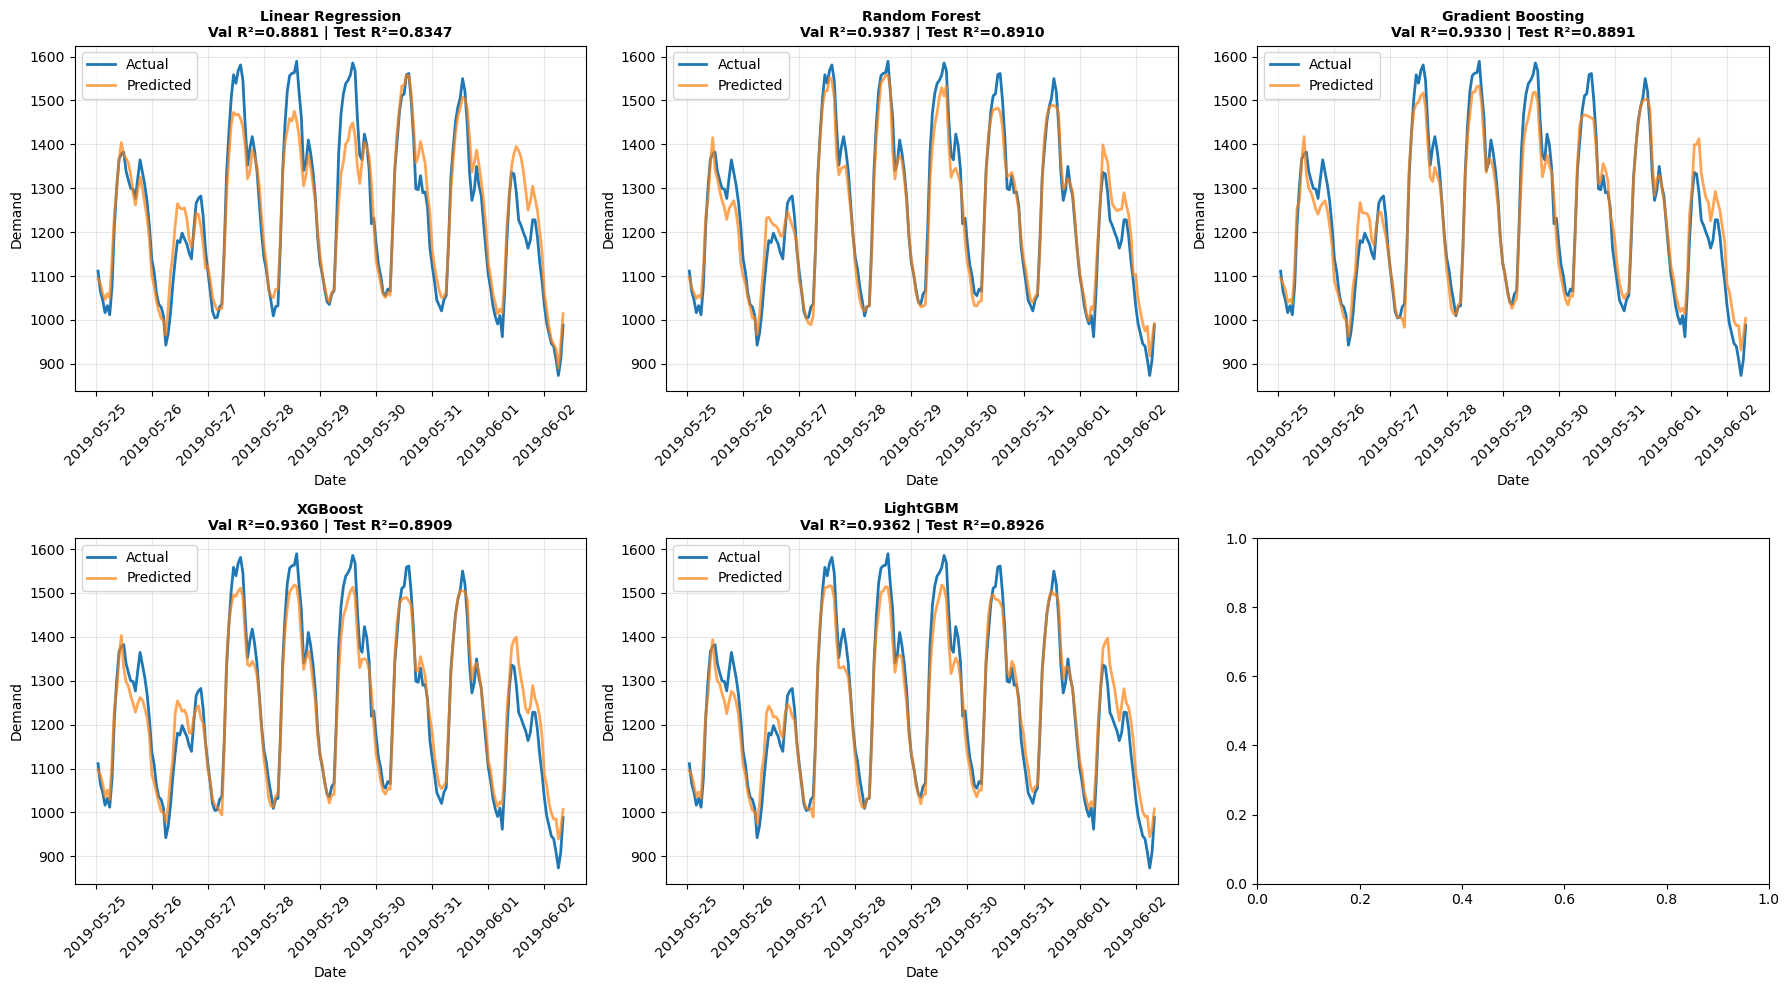

تم حفظ الرسوم في 'metrics_comparison.png'


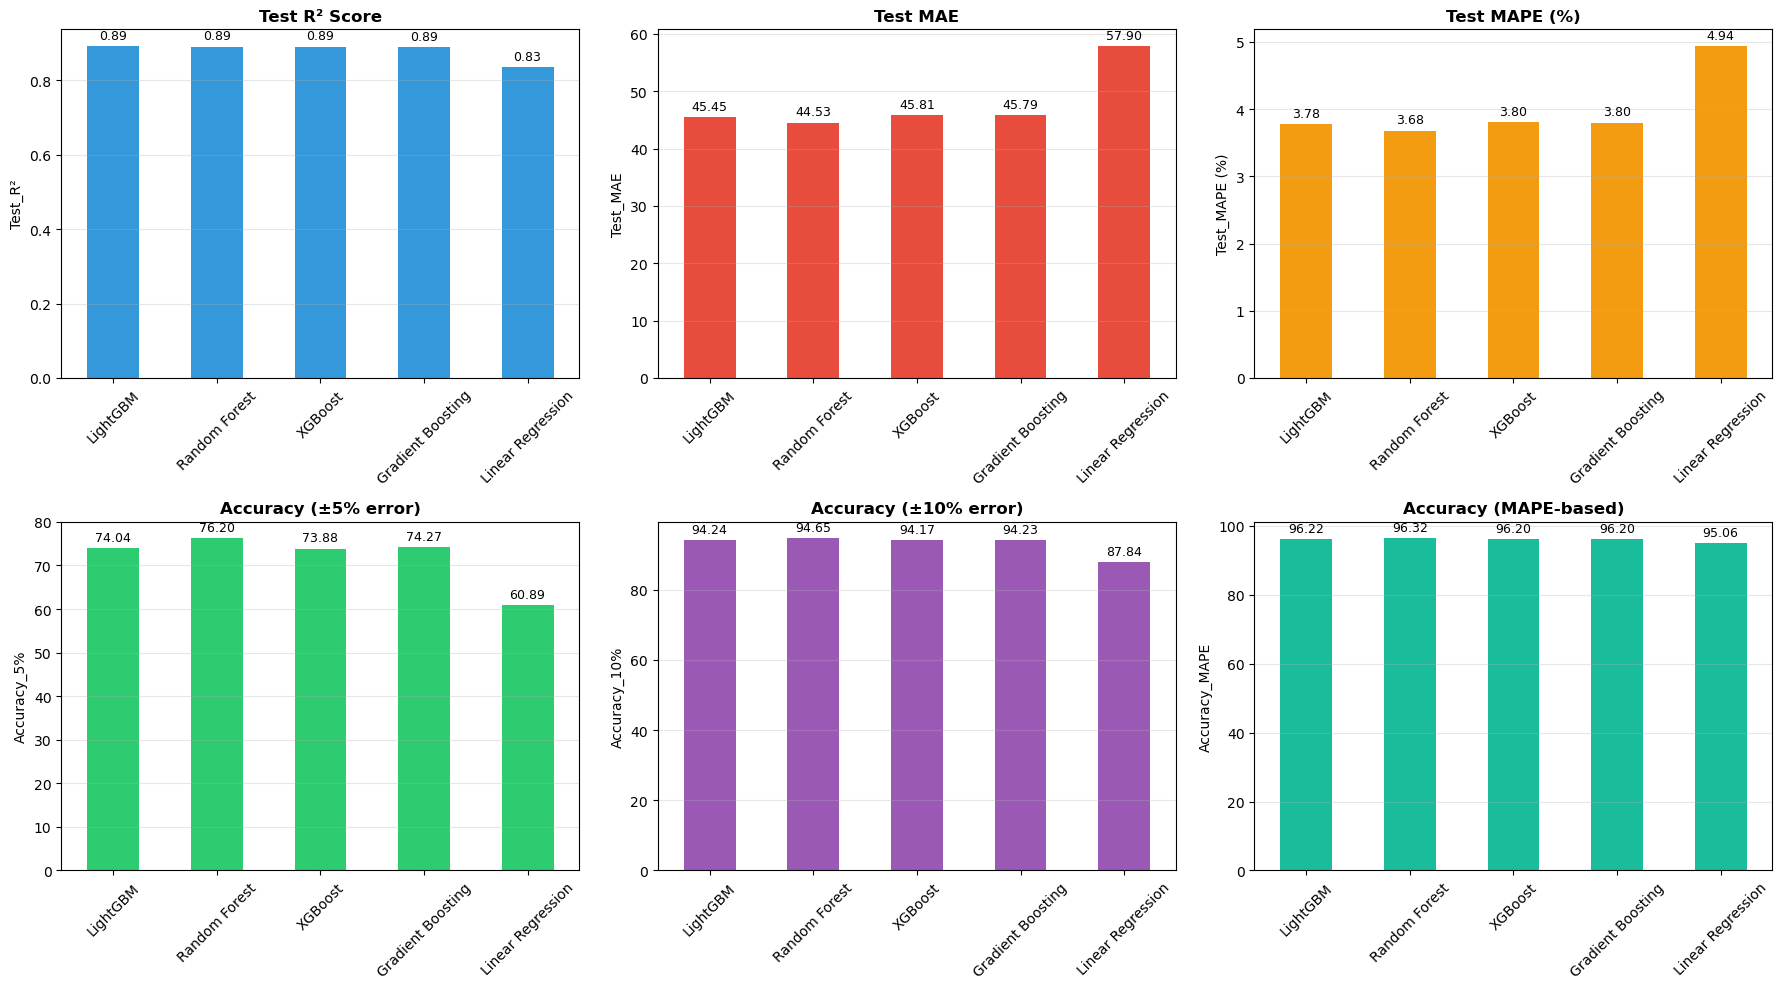

In [13]:
# ==========================================
# الخطوة 9: رسم النتائج
# ==========================================
print("\n" + "=" * 50)
print("الخطوة 9: رسم النتائج")
print("=" * 50)

# اختيار أفضل نموذج
best_model = comparison_df.iloc[0]['Model']
print(f"\nأفضل نموذج: {best_model}")

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, (name, result) in enumerate(results.items()):
    ax = axes[idx]
    
    # رسم القيم الفعلية والمتوقعة
    test_dates = df['datetime'].iloc[split_idx:].values
    ax.plot(test_dates[:200], y_test.values[:200], label='Actual', linewidth=2)
    ax.plot(test_dates[:200], result['predictions'][:200], label='Predicted', linewidth=2, alpha=0.7)
    
    ax.set_title(f'{name}\nVal R²={result["Val_R2"]:.4f} | Test R²={result["Test_R2"]:.4f}', 
                 fontweight='bold', fontsize=10)
    ax.set_xlabel('Date')
    ax.set_ylabel('Demand')
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('model_predictions.png', dpi=300, bbox_inches='tight')
print("تم حفظ الرسوم في 'model_predictions.png'")
plt.show()

# رسم مقارنة المقاييس
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

metrics = [
    ('Test_R²', 'Test R² Score'),
    ('Test_MAE', 'Test MAE'),
    ('Test_MAPE (%)', 'Test MAPE (%)'),
    ('Accuracy_5%', 'Accuracy (±5% error)'),
    ('Accuracy_10%', 'Accuracy (±10% error)'),
    ('Accuracy_MAPE', 'Accuracy (MAPE-based)')
]

colors = ['#3498db', '#e74c3c', '#f39c12', '#2ecc71', '#9b59b6', '#1abc9c']

for idx, (metric, title) in enumerate(metrics):
    ax = axes[idx]
    comparison_df.plot(x='Model', y=metric, kind='bar', ax=ax, legend=False, 
                       color=colors[idx])
    ax.set_title(title, fontweight='bold', fontsize=12)
    ax.set_ylabel(metric)
    ax.set_xlabel('')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, alpha=0.3, axis='y')
    
    # إضافة القيم على الأعمدة
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', padding=3, fontsize=9)

plt.tight_layout()
plt.savefig('metrics_comparison.png', dpi=300, bbox_inches='tight')
print("تم حفظ الرسوم في 'metrics_comparison.png'")
plt.show()


الخطوة 10: Feature Importance

أهم 15 متغير:
                    Feature  Importance
27   demand_rolling_mean_24         459
18                     hour         372
23            demand_lag_24         243
28    demand_rolling_std_24         208
26           demand_lag_168         201
19                dayofweek         194
12               Holiday_ID         136
25            demand_lag_72         109
0                   T2M_toc          89
32    demand_rolling_std_72          70
33  demand_rolling_mean_168          68
30    demand_rolling_std_48          61
2                   TQL_toc          52
24            demand_lag_48          47
21                dayofyear          44

تم حفظ Feature Importance في 'feature_importance.png'


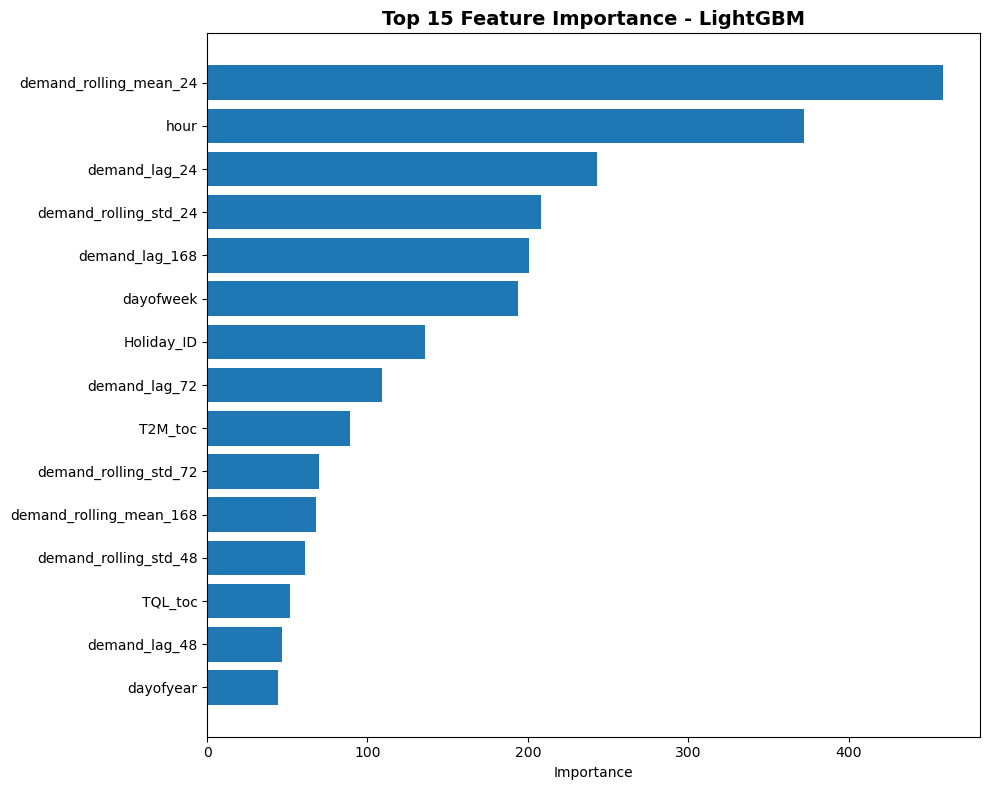


انتهى التحليل بنجاح! ✓

ملخص النتائج:
✓ أفضل نموذج: LightGBM
✓ Accuracy (±5%): 74.04%
✓ Accuracy (±10%): 94.24%
✓ R² Score: 0.8926
✓ MAPE: 3.78%

الملفات المحفوظة:
1. demand_analysis.png - تحليل البيانات
2. model_predictions.png - التنبؤات
3. metrics_comparison.png - مقارنة المقاييس والـ Accuracy
4. model_comparison.csv - جدول المقارنة
5. feature_importance.png - أهمية المتغيرات


In [14]:
# ==========================================
# الخطوة 10: Feature Importance (لأفضل نموذج)
# ==========================================
print("\n" + "=" * 50)
print("الخطوة 10: Feature Importance")
print("=" * 50)

if best_model in ['Random Forest', 'Gradient Boosting', 'XGBoost', 'LightGBM']:
    best_model_obj = models[best_model]
    
    if best_model == 'XGBoost':
        importances = best_model_obj.feature_importances_
    elif best_model == 'LightGBM':
        importances = best_model_obj.feature_importances_
    else:
        importances = best_model_obj.feature_importances_
    
    feature_importance = pd.DataFrame({
        'Feature': features,
        'Importance': importances
    }).sort_values('Importance', ascending=False)
    
    print("\nأهم 15 متغير:")
    print(feature_importance.head(15))
    
    # رسم Feature Importance
    plt.figure(figsize=(10, 8))
    top_features = feature_importance.head(15)
    plt.barh(range(len(top_features)), top_features['Importance'])
    plt.yticks(range(len(top_features)), top_features['Feature'])
    plt.xlabel('Importance')
    plt.title(f'Top 15 Feature Importance - {best_model}', fontweight='bold', fontsize=14)
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
    print("\nتم حفظ Feature Importance في 'feature_importance.png'")
    plt.show()

print("\n" + "=" * 50)
print("انتهى التحليل بنجاح! ✓")
print("=" * 50)
print("\nملخص النتائج:")
print(f"✓ أفضل نموذج: {best_model}")
print(f"✓ Accuracy (±5%): {comparison_df.iloc[0]['Accuracy_5%']:.2f}%")
print(f"✓ Accuracy (±10%): {comparison_df.iloc[0]['Accuracy_10%']:.2f}%")
print(f"✓ R² Score: {comparison_df.iloc[0]['Test_R²']:.4f}")
print(f"✓ MAPE: {comparison_df.iloc[0]['Test_MAPE (%)']:.2f}%")
print("\nالملفات المحفوظة:")
print("1. demand_analysis.png - تحليل البيانات")
print("2. model_predictions.png - التنبؤات")
print("3. metrics_comparison.png - مقارنة المقاييس والـ Accuracy")
print("4. model_comparison.csv - جدول المقارنة")
print("5. feature_importance.png - أهمية المتغيرات")

In [15]:
import joblib

# حفظ الموديل الأفضل
joblib.dump(models['Random Forest'], 'temp_model.pkl')
joblib.dump(scaler, 'temp_scaler.pkl')
joblib.dump(list(X_train.columns), 'temp_features.pkl')

# حفظ النتائج
results_dict = {
    'test_r2': results['Random Forest']['Test_R2'],
    'test_mae': results['Random Forest']['Test_MAE'],
    'test_mape': results['Random Forest']['Test_MAPE'],
    'accuracy_5': results['Random Forest']['Accuracy_5%'],
    'accuracy_10': results['Random Forest']['Accuracy_10%']
}
joblib.dump(results_dict, 'temp_results.pkl')
print("✓ تم حفظ الملفات المؤقتة")

✓ تم حفظ الملفات المؤقتة
